In [1]:
#nativos
import random

from sympy import *
#import pandas as pd
from IPython.display import Image, display, display_html
from sympy.plotting import plot as plot_sympy
from numpy import linspace
import matplotlib.pyplot as mpl
import numpy as np
from scipy import optimize

In [2]:
init_printing() 

In [3]:
x = Symbol('x')

In [71]:
class OptimizationMethods:
    def __init__(self, funcion_sympy, *args, **kwargs):
        self.buscar_extremo_inferior_desde = kwargs.get('buscar_extremo_inferior_desde', -100)
        self.buscar_extremo_superior_desde = kwargs.get('buscar_extremo_superior_desde', 100)
        self.fsympy = funcion_sympy
        
        # transformo funcion sympy a funcion numpy
        self.fx_sympy = funcion_sympy
        self.fx = lambdify(x, funcion_sympy, 'numpy')
        
        # mensaje de error
        self.mjse_error_intervalo = "ERROR: valores de intervalo [{}, {}] no cumple con Teorema de Bolzano, pruebe ampliandolo"
        #random.randint(-100, 100)
    
    
    def get_solution(self, metodo, **kwargs):
        config = list(kwargs.keys())
        
        # Seleccion de los puntos iniciaales
        if metodo == 'bisection':
            self.buscar_extremo_inferior_desde = kwargs.get('buscar_extremo_inferior_desde', -100)
            self.buscar_extremo_superior_desde = kwargs.get('buscar_extremo_superior_desde', 100)
        else:
            self.punto_inicial = kwargs.get('punto_inicial', None)
            self.buscar_extremo_inferior_desde = kwargs.get('buscar_punto_inicial_desde', -1000)
            self.buscar_extremo_superior_desde = kwargs.get('buscar_punto_inicial_hasta', 1000)
        
        # Parametros del grafico
        self.ampliacion_grafico = kwargs.get('ampliacion', 50)
        self.step = kwargs.get('step', 2)
        
        # retiro parametros no propios del metodo de bisection/newton heredado
        for parameter in ['buscar_extremo_inferior_desde', 'buscar_extremo_superior_desde', 'ampliacion', 'step',
                          'punto_inicial', 'buscar_punto_inicial_desde', 'buscar_punto_inicial_hasta']:
            if parameter in config:
                del kwargs[parameter]
        
        # seteo configuracion en caso no se haiga compartido
        if 'full_output' not in config:
            kwargs['full_output'] = True
            
        # seteo configuracion en caso no se haiga compartido
        if 'disp' not in config:
            kwargs['disp'] = False
        
        print("Confgiguracion detectada: ", str(kwargs))
        
        if metodo == 'bisection':
            a, b = self.get_puntos_iniciales()
            print("Intervalo inicial seleccionado: [{}, {}]".format(a,b))
            sol = optimize.bisect(self.fx, a, b, **kwargs)
            
        elif metodo == 'newton':
            derivate = lambdify(x, self.fx_sympy.diff(x, 1), 'numpy')
            
            if self.punto_inicial and isinstance(self.punto_inicial, (int, float)):
                print("Punto inicial: ", self.punto_inicial)
        
                sol = optimize.newton(self.fx, self.punto_inicial, derivate, **kwargs)
                
            else:
                pto_inicial, _ = self.get_puntos_iniciales()
                print("Al no colocar punto inicial se toma {} del intervalo: [{}, {}]".format(
                      pto_inicial, 
                      self.buscar_extremo_inferior_desde, 
                      self.buscar_extremo_superior_desde)
                )
                sol = optimize.newton(self.fx, pto_inicial, derivate, **kwargs)
        else:
            sol = None
            
        self.obtener_grafico(sol[0], ampliacion=self.ampliacion_grafico, step=self.step)
        return sol

    def biseccion(self, **kwargs):
        return self.get_solution('bisection', **kwargs)
    
    def newton(self, **kwargs):
        return self.get_solution('newton', **kwargs)
    
    def secante(self, **kwargs):
        return self.get_solution('secante', **kwargs)
    
    def obtener_grafico(self, x_solucion, ampliacion=50, step=2):
        x_vals_1 = np.arange(x_solucion - ampliacion, x_solucion + ampliacion, step)
        y_vals_1 = self.fx(x_vals_1)

        mpl.plot(x_vals_1, y_vals_1, 'bd', x_solucion,  self.fsympy.subs(x, x_solucion), 'ro')
        mpl.show()
    
    def get_puntos_iniciales(self):
        contador = 1
        while True:
            if contador > 300:
                raise Exception(self.mjse_error_intervalo.format(self.extremo_inferior, self.extremo_superior))
            contador += 1
            
            a = random.randint(self.buscar_extremo_inferior_desde, self.buscar_extremo_superior_desde)
            b = random.randint(self.buscar_extremo_inferior_desde, self.buscar_extremo_superior_desde)
            
            #print(self.fsympy.subs(x, a), self.fsympy.subs(x, b))
            try:
                if self.fsympy.subs(x, a)*self.fsympy.subs(x, b) < 0 and a < b:
                    return a, b
            except:
                continue

# Método de bisección para resolver una ecuación no lineal en el campo de la Ingeniería Industrial

Trabajas para una nueva empresa de ensamblaje de computadoras y se le ha pedido que determine la cantidad mínima de computadoras que la tienda tendrá que vender para obtener ganancias.
La ecuación que da el número mínimo de computadoras "x" que se venderán después de considerar los costos totales y las ventas totales es:

In [72]:
fx = 40*x**(3/2) - 875*x + 35000
fx

Utilice el método de bisección para encontrar raíces de ecuaciones para encontrar la cantidad mínima de computadoras que deben venderse para obtener ganancias. Realice tres iteraciones para estimar la raíz de la ecuación anterior. Encuentre el error absoluto relativo aproximado al final de cada iteración y el número de dígitos significativos al menos correcto al final de cada iteración.

In [73]:
resolver = OptimizationMethods(fx)

# BISECTION

### >>> Solucion pegada al pdf

Confgiguracion detectada:  {'maxiter': 100, 'disp': False, 'full_output': True}
Intervalo inicial seleccionado: [29, 74]


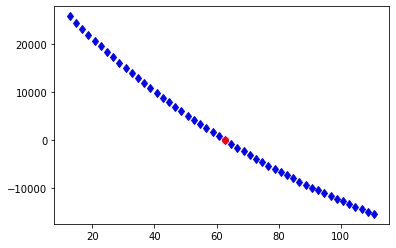

(62.691697151221405,
       converged: True
            flag: 'converged'
  function_calls: 47
      iterations: 45
            root: 62.691697151221405)

In [74]:
resolver.biseccion(maxiter=100, disp=False)

### >>> Busqueda de mas puntos críticos posibles

Confgiguracion detectada:  {'maxiter': 100, 'disp': False, 'full_output': True}
Intervalo inicial seleccionado: [29, 82]


<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in power
  return (-875*x + 40*x**1.5 + 35000)


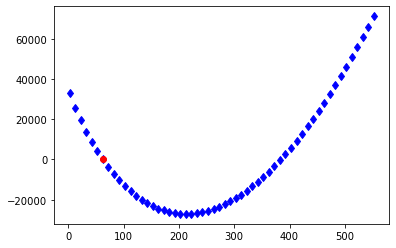

(62.691697151221916,
       converged: True
            flag: 'converged'
  function_calls: 47
      iterations: 45
            root: 62.691697151221916)

In [75]:
resolver.biseccion(maxiter=100, disp=False, ampliacion=500, step=10)

### >>> Cambio de rango de busqueda de puntos iniciales

Confgiguracion detectada:  {'maxiter': 100, 'disp': False, 'full_output': True}
Intervalo inicial seleccionado: [379, 468]


<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in power
  return (-875*x + 40*x**1.5 + 35000)


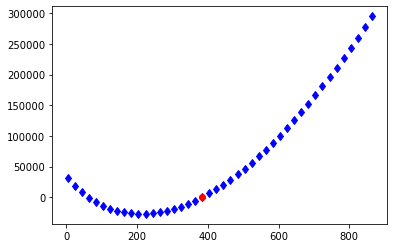

(384.0222773527168,
       converged: True
            flag: 'converged'
  function_calls: 48
      iterations: 46
            root: 384.0222773527168)

In [76]:
resolver.biseccion(maxiter=100, disp=False, ampliacion=500, step=20, 
                   buscar_extremo_inferior_desde=200, buscar_extremo_superior_desde=500)

### >>> ¿Que pasa si busco en un rango donde estan los dos puntos criticos?

Confgiguracion detectada:  {'maxiter': 100, 'disp': False, 'full_output': True}
Intervalo inicial seleccionado: [142, 449]


<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in power
  return (-875*x + 40*x**1.5 + 35000)


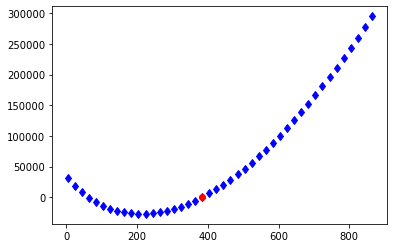

(384.02227735271606,
       converged: True
            flag: 'converged'
  function_calls: 49
      iterations: 47
            root: 384.02227735271606)

In [77]:
resolver.biseccion(maxiter=100, disp=False, ampliacion=500, step=20, 
                   buscar_extremo_inferior_desde=0, buscar_extremo_superior_desde=500)

Confgiguracion detectada:  {'maxiter': 100, 'disp': False, 'full_output': True}
Intervalo inicial seleccionado: [125, 432]


<lambdifygenerated-18>:2: RuntimeWarning: invalid value encountered in power
  return (-875*x + 40*x**1.5 + 35000)


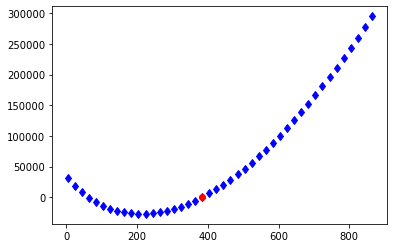

(384.02227735271464,
       converged: True
            flag: 'converged'
  function_calls: 49
      iterations: 47
            root: 384.02227735271464)

In [78]:
resolver.biseccion(maxiter=100, disp=False, ampliacion=500, step=20, 
                   buscar_extremo_inferior_desde=0, buscar_extremo_superior_desde=500)

# NEWTON

### >>> Siguiendo indicaciones del pdf

Confgiguracion detectada:  {'maxiter': 100, 'full_output': True, 'disp': False}
Punto inicial:  50


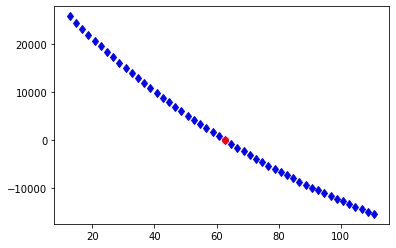

(62.69169715122135,
       converged: True
            flag: 'converged'
  function_calls: 9
      iterations: 4
            root: 62.69169715122135)

In [79]:
resolver.newton(punto_inicial=50, maxiter=100)

### >>> Buscando mi propio punto inicial

Confgiguracion detectada:  {'maxiter': 100, 'full_output': True, 'disp': False}
Al no colocar punto inicial se toma 302 del intervalo: [-1000, 1000]


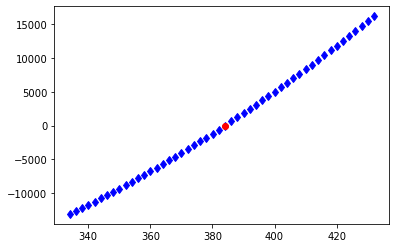

(384.02227735271606,
       converged: True
            flag: 'converged'
  function_calls: 11
      iterations: 5
            root: 384.02227735271606)

In [80]:
resolver.newton(maxiter=100)

Confgiguracion detectada:  {'maxiter': 100, 'full_output': True, 'disp': False}
Al no colocar punto inicial se toma 119 del intervalo: [-1000, 1000]


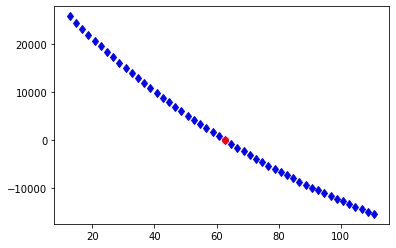

(62.69169715122135,
       converged: True
            flag: 'converged'
  function_calls: 12
      iterations: 6
            root: 62.69169715122135)

In [84]:
resolver.newton(maxiter=100)